<a href="https://colab.research.google.com/github/sachsac/Astrology_and_Birth_Months/blob/main/Graphing_Project_Birthdays_Astrology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib --upgrade #necessary for use of bar_label
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
birthday_df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/data set/US_births_1994-2014_astrology.xlsx')
birthday_df.tail(5)

,year,month,date_of_month,day_of_week,births,astrological_sign
7665,2014.0,12.0,27.0,6.0,8656.0,Capricorn
7666,2014.0,12.0,28.0,7.0,7724.0,Capricorn
7667,2014.0,12.0,29.0,1.0,12811.0,Capricorn
7668,2014.0,12.0,30.0,2.0,13634.0,Capricorn
7669,2014.0,12.0,31.0,3.0,11990.0,Capricorn


In [3]:
#changing float -> integer
birthday_df[['month', 'date_of_month', 'births', 'year', 'day_of_week']] = birthday_df[['month', 'date_of_month', 'births', 'year', 'day_of_week']].astype(int)

In [4]:
birthday_df['month'] = birthday_df['month'].replace([1], 'January')
birthday_df['month'] = birthday_df['month'].replace([2], 'February')
birthday_df['month'] = birthday_df['month'].replace([3], 'March')
birthday_df['month'] = birthday_df['month'].replace([4], 'April')
birthday_df['month'] = birthday_df['month'].replace([5], 'May')
birthday_df['month'] = birthday_df['month'].replace([6], 'June')
birthday_df['month'] = birthday_df['month'].replace([7], 'July')
birthday_df['month'] = birthday_df['month'].replace([8], 'August')
birthday_df['month'] = birthday_df['month'].replace([9], 'September')
birthday_df['month'] = birthday_df['month'].replace([10], 'October')
birthday_df['month'] = birthday_df['month'].replace([11], 'November')
birthday_df['month'] = birthday_df['month'].replace([12], 'December')
birthday_df

,year,month,date_of_month,day_of_week,births,astrological_sign
0,1994,January,1,6,8096,Capricorn
1,1994,January,2,7,7772,Capricorn
2,1994,January,3,1,10142,Capricorn
3,1994,January,4,2,11248,Capricorn
4,1994,January,5,3,11053,Capricorn
...,...,...,...,...,...,...
7665,2014,December,27,6,8656,Capricorn
7666,2014,December,28,7,7724,Capricorn
7667,2014,December,29,1,12811,Capricorn
7668,2014,December,30,2,13634,Capricorn


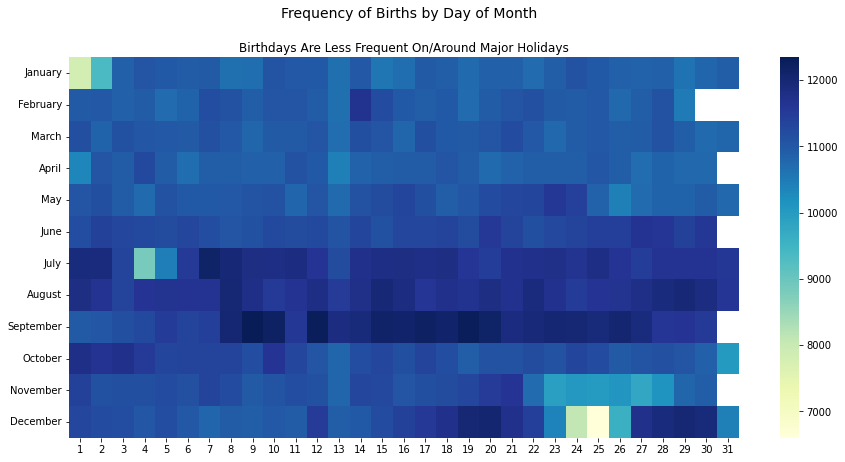

In [5]:
#resizing to see each date in month
fig, ax = plt.subplots(figsize=(15, 7))

#plot set up
birthday_map = pd.pivot_table(birthday_df, values= 'births',
                              index = ['month'],
                              columns = 'date_of_month')
birthday_map.index = pd.CategoricalIndex(birthday_map.index, 
                                         categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
birthday_map.sort_index(axis=0, ascending=True, inplace=True)
sns.heatmap(birthday_map, cmap="YlGnBu")

#reducing redundancy
plt.ylabel('')
plt.xlabel('')

#title
plt.suptitle('Frequency of Births by Day of Month', fontsize = 14, x=.44) # x value to shift towards the center of graph
plt.title('Birthdays Are Less Frequent On/Around Major Holidays');

In [6]:
birthday_df.groupby(['month'])['births'].sum()
#ensuring that our barplot matches our expected values

month
April        6850733
August       7624626
December     7155101
February     6511697
January      6979322
July         7527284
June         7122586
March        7147368
May          7175367
November     6884173
October      7293822
September    7440659
Name: births, dtype: int64

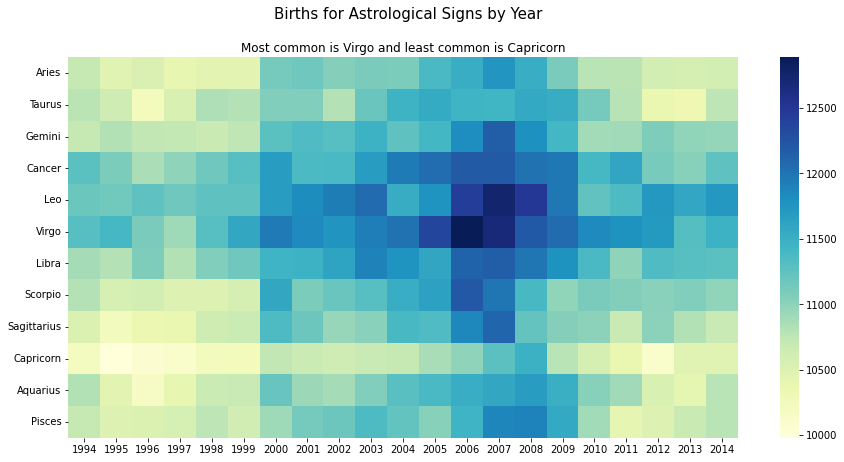

In [7]:
#resizing
fig, ax = plt.subplots(figsize=(15, 7))

sign_map = pd.pivot_table(birthday_df, values= 'births',
                              index = ['astrological_sign'],
                              columns = 'year')
sign_map.index = pd.CategoricalIndex(sign_map.index, categories = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
sign_map.sort_index(axis=0, ascending=True, inplace=True)
sns.heatmap(sign_map, cmap="YlGnBu")

#remove labels
plt.ylabel('')
plt.xlabel('')

#titles
plt.suptitle('Births for Astrological Signs by Year', fontsize = 15, x = .44)
plt.title('Most common is Virgo and least common is Capricorn');

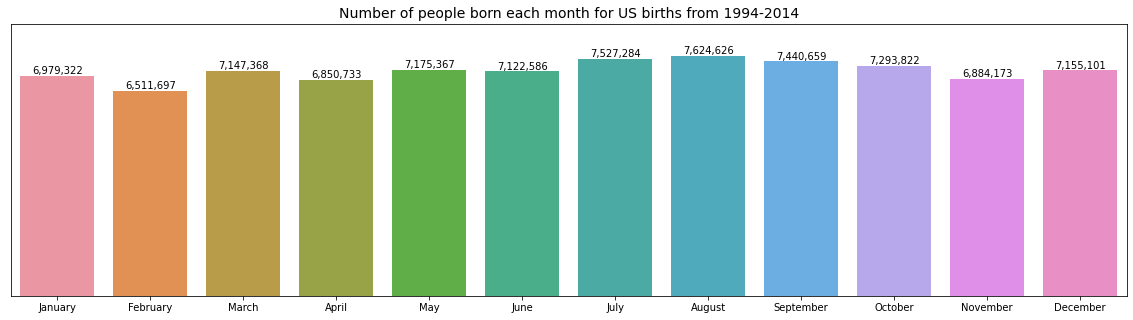

In [8]:
#plot set up
monthly_births = birthday_df.groupby(['month'])['births'].sum()
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot(x = monthly_births.index, 
            y = monthly_births.values,
            order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#set y axis range
max_y = monthly_births.values.max()
plt.ylim(0, (max_y+1000000)) #add cushion above our max

#data labels
container = ax.containers[0]
ax.bar_label(container, fmt = '%d', labels=[f'{x:,.0f}' for x in container.datavalues]) #this formula adds commas to data labels

#set axis labels invisible as they are redundant
ax.get_yaxis().set_visible(False)
plt.xlabel('')

#Title
plt.title('Number of people born each month for US births from 1994-2014', fontsize=14);

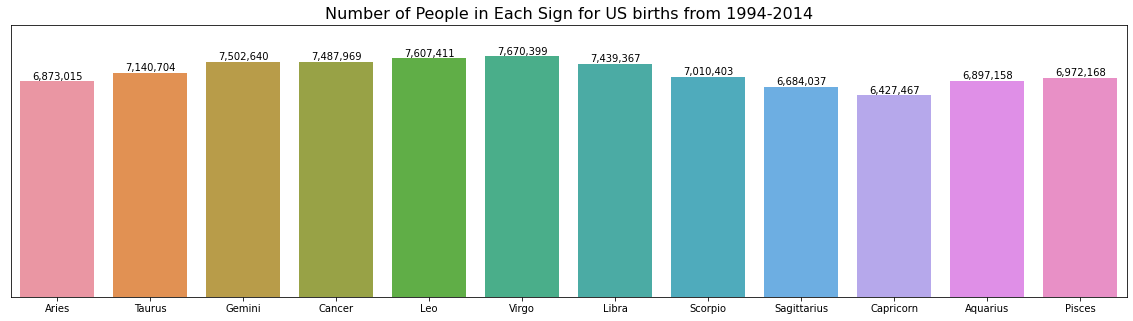

In [9]:
#resizing 
fig, ax = plt.subplots(figsize=(20, 5))

#plot set up
sign_births = birthday_df.groupby(['astrological_sign'])['births'].sum()
signs_bar = sns.barplot(x = sign_births.index,
                        y = sign_births.values,
                        order= ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])

#set y axis range
max_y = sign_births.values.max()
plt.ylim(0, (max_y+1000000)) #add cushion above our max

#reduce redundancy
ax.get_yaxis().set_visible(False)
plt.xlabel('')

#set data labels
container = ax.containers[0]
ax.bar_label(container, fmt = '%d', labels=[f'{x:,.0f}' for x in container.datavalues]) 

#title
plt.title('Number of People in Each Sign for US births from 1994-2014', fontsize = 16);

In [10]:
birthday_df.groupby(['astrological_sign'])['births'].sum()
#ensuring that our barplot matches our expected values

astrological_sign
Aquarius       6897158
Aries          6873015
Cancer         7487969
Capricorn      6427467
Gemini         7502640
Leo            7607411
Libra          7439367
Pisces         6972168
Sagittarius    6684037
Scorpio        7010403
Taurus         7140704
Virgo          7670399
Name: births, dtype: int64